### Data Assesment

In [58]:
from google.colab import files

files.upload()

Saving bersih.csv to bersih (1).csv


{'bersih.csv': b';Ulasan_bersih;Label_bersih\n0;Terminalnya sederhana tapi banyak jurusan terutama Jawa Barat;Positif\n1;Tempat bus dan transportasi menuju kampung halaman dan antar kota Lengkap berbagai tujuan dan fasilitas;Positif\n2;Kotorsemrawutbanyak calo tiket;Negatif\n3;Banyak pengamen Tolong dibenahi sistem kenyaman penumpang Bukan satu pengamen tapi sekitarsilih datang jika suara bagus tak masalah tapi sebaliknya mengganggu perjalanan Nyesel naik bus di bekasi Tolong pemkotatau instansi yang bertanggung jawab terhadap tranportasi perbaiki jangan pencitraan;Negatif\n4;Banyak PREMAN PUNGLI AMBIL PAKET EH DIMINTAIN LAGI UANG TUNGGU KATANYA;Negatif\n5;Butuh pengaturan biar makin lancar;Positif\n6;Mending kalau pesan ojol jangan di dalam terminalnya banyak Preman ojek di pintu keluar Bis yang selalu mengancam keselamatan dan memaki penumpang dan ojol nya Pemkot Bekasi perlu tindak tegas keamanan di terminal pintu keluar tidak terjamin Saya rasa jika pesan ojek pangkalan disitu pun 

In [20]:
from google.colab import files

files.upload()

Saving stopwordbahasa.csv to stopwordbahasa.csv


{'stopwordbahasa.csv': b'ada\nadalah\nadanya\nadapun\nagak\nagaknya\nagar\nakan\nakankah\nakhir\nakhiri\nakhirnya\naku\nakulah\namat\namatlah\nanda\nandalah\nantar\nantara\nantaranya\napa\napaan\napabila\napakah\napalagi\napatah\nartinya\nasal\nasalkan\natas\natau\nataukah\nataupun\nawal\nawalnya\nbagai\nbagaikan\nbagaimana\nbagaimanakah\nbagaimanapun\nbagi\nbagian\nbahkan\nbahwa\nbahwasanya\nbaik\nbakal\nbakalan\nbalik\nbanyak\nbapak\nbaru\nbawah\nbeberapa\nbegini\nbeginian\nbeginikah\nbeginilah\nbegitu\nbegitukah\nbegitulah\nbegitupun\nbekerja\nbelakang\nbelakangan\nbelum\nbelumlah\nbenar\nbenarkah\nbenarlah\nberada\nberakhir\nberakhirlah\nberakhirnya\nberapa\nberapakah\nberapalah\nberapapun\nberarti\nberawal\nberbagai\nberdatangan\nberi\nberikan\nberikut\nberikutnya\nberjumlah\nberkali-kali\nberkata\nberkehendak\nberkeinginan\nberkenaan\nberlainan\nberlalu\nberlangsung\nberlebihan\nbermacam\nbermacam-macam\nbermaksud\nbermula\nbersama\nbersama-sama\nbersiap\nbersiap-siap\nbertanya\n

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
sentimen_df = pd.read_csv("data_sentimen.csv")
sentimen_df.head(5)

,Ulasan,Label
0,"Terminalnya sederhana, tapi banyak jurusan,, t...",Positif
1,Tempat bus dan transportasi menuju kampung hal...,Positif
2,Kotor.semrawut.banyak calo tiket,Negatif
3,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif
4,"Banyak PREMAN PUNGLI, AMBIL PAKET EH DIMINTAIN...",Negatif


In [87]:
df_stopwords = pd.read_csv("stopwordbahasa.csv",names=['kata'])
df_stopwords.head(5)

,kata
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [22]:
sentimen_df.head(5)

,Ulasan_bersih,Label_bersih
0,Terminalnya sederhana tapi banyak jurusan teru...,Positif
1,Tempat bus dan transportasi menuju kampung hal...,Positif
2,Kotorsemrawutbanyak calo tiket,Negatif
3,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif
4,Banyak PREMAN PUNGLI AMBIL PAKET EH DIMINTAIN ...,Negatif


In [88]:
sentimen_df.describe()

,Ulasan,Label
count,1805,1805
unique,1583,3
top,Bagus,Positif
freq,58,1450


In [89]:
sentimen_df.shape

(1805, 2)

In [90]:
sentimen_df.isnull().sum()

Ulasan    0
Label     0
dtype: int64

### Data Cleaning

In [123]:
import re

In [91]:
def cleanText(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

    text = re.sub('\@\w+|\#\w+|\d+','',text) # Remove @mentions
    text = re.sub('http(s?)(:?)\/\/\S+','', text) # Removing the hyper link
    text = re.sub('#','',text)  # Removing the # symbols
    text = re.sub(':','',text)  # Removing the : symbols
    text = re.sub('\"','',text) # Removing the " symbols
    text = re.sub('\”','',text) # Removing the ” symbols
    text = re.sub('\“','',text) # Removing the “ symbols
    text = re.sub('\’','',text) # Removing the ’ symbols
    text = re.sub('\/','',text) # Removing the / symbols
    text = re.sub('\|','',text) # Removing the | symbols
    text = re.sub('\?','',text) # Removing the ? symbols
    text = re.sub('\.','',text) # Removing the . symbols
    text = re.sub('\,','',text) # Removing the , symbols
    text = re.sub('\!','',text) # Removing the ! symbols
    text = re.sub('@','',text) # Removing the @ symbols
    text = re.sub('\'','',text) # Removing the ' symbols
    text = re.sub('\\n','',text) # Removing the \n symbols
    text = re.sub('\\r','',text) # Removing the \r symbols
    text = re.sub('\*','',text) # Removing the * symbols
    text = re.sub(r'\\x.{2}',' ', text) #Removing bytes
    text = re.sub('  +', '', text) # Removing more spaces
    text = re.sub(r'[^\w\s]', ' ', text) # Removing punctuation
    text = emoji_pattern.sub('', text) # Removing emoji patterns
    return text

sentimen_df['Ulasan_baru'] = sentimen_df['Ulasan'].apply(cleanText)
sentimen_df['Label_baru'] = sentimen_df['Label'].apply(cleanText)

In [92]:
sentimen_df.head(5)

,Ulasan,Label,Ulasan_baru,Label_baru
0,"Terminalnya sederhana, tapi banyak jurusan,, t...",Positif,Terminalnya sederhana tapi banyak jurusan teru...,Positif
1,Tempat bus dan transportasi menuju kampung hal...,Positif,Tempat bus dan transportasi menuju kampung hal...,Positif
2,Kotor.semrawut.banyak calo tiket,Negatif,Kotorsemrawutbanyak calo tiket,Negatif
3,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif
4,"Banyak PREMAN PUNGLI, AMBIL PAKET EH DIMINTAIN...",Negatif,Banyak PREMAN PUNGLI AMBIL PAKET EH DIMINTAIN ...,Negatif


In [93]:
sentimen_df.drop(sentimen_df.columns[0], axis=1, inplace=True)
sentimen_df.head(5)

,Label,Ulasan_baru,Label_baru
0,Positif,Terminalnya sederhana tapi banyak jurusan teru...,Positif
1,Positif,Tempat bus dan transportasi menuju kampung hal...,Positif
2,Negatif,Kotorsemrawutbanyak calo tiket,Negatif
3,Negatif,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif
4,Negatif,Banyak PREMAN PUNGLI AMBIL PAKET EH DIMINTAIN ...,Negatif


In [94]:
sentimen_df.drop(sentimen_df.columns[0], axis=1, inplace=True)
sentimen_df.head(5)

,Ulasan_baru,Label_baru
0,Terminalnya sederhana tapi banyak jurusan teru...,Positif
1,Tempat bus dan transportasi menuju kampung hal...,Positif
2,Kotorsemrawutbanyak calo tiket,Negatif
3,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif
4,Banyak PREMAN PUNGLI AMBIL PAKET EH DIMINTAIN ...,Negatif


In [95]:
sentimen_df.describe()

,Ulasan_baru,Label_baru
count,1805,1805
unique,1579,3
top,Bagus,Positif
freq,58,1450


In [96]:
sentimen_df.isnull().sum()

Ulasan_baru    0
Label_baru     0
dtype: int64

In [97]:
sentimen_df.shape

(1805, 2)

### Data PreProcessing

In [98]:
# meremove kata pada df.text yang ada di stopwords
list_stopwords = df_stopwords['kata'].to_list()
list_stopwords.append("nya")

def remove_stopwords(s):
  s = s.split(" ") # merubah string menjadi list
  s = [x for x in s if x not in list_stopwords] # menghapus kata pada s, jika kata tersebut ada pada list_stopwords
  s = ' '.join(s) # menggabung list menjadi string, dipisah oleh spasi
  return s

sentimen_df['Ulasan'] = sentimen_df.Ulasan_baru.apply(remove_stopwords) # apply function remove_stopwords untuk bikin kolom baru
sentimen_df['Label'] = sentimen_df.Label_baru.apply(remove_stopwords)
sentimen_df.head(5)

,Ulasan_baru,Label_baru,Ulasan,Label
0,Terminalnya sederhana tapi banyak jurusan teru...,Positif,Terminalnya sederhana jurusan Jawa Barat,Positif
1,Tempat bus dan transportasi menuju kampung hal...,Positif,Tempat bus transportasi kampung halaman kota L...,Positif
2,Kotorsemrawutbanyak calo tiket,Negatif,Kotorsemrawutbanyak calo tiket,Negatif
3,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif
4,Banyak PREMAN PUNGLI AMBIL PAKET EH DIMINTAIN ...,Negatif,Banyak PREMAN PUNGLI AMBIL PAKET EH DIMINTAIN ...,Negatif


In [99]:
sentimen_df.drop(sentimen_df.columns[0], axis=1, inplace=True)
sentimen_df.head(5)

,Label_baru,Ulasan,Label
0,Positif,Terminalnya sederhana jurusan Jawa Barat,Positif
1,Positif,Tempat bus transportasi kampung halaman kota L...,Positif
2,Negatif,Kotorsemrawutbanyak calo tiket,Negatif
3,Negatif,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif
4,Negatif,Banyak PREMAN PUNGLI AMBIL PAKET EH DIMINTAIN ...,Negatif


In [100]:
sentimen_df.drop(sentimen_df.columns[0], axis=1, inplace=True)
sentimen_df.head(5)

,Ulasan,Label
0,Terminalnya sederhana jurusan Jawa Barat,Positif
1,Tempat bus transportasi kampung halaman kota L...,Positif
2,Kotorsemrawutbanyak calo tiket,Negatif
3,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif
4,Banyak PREMAN PUNGLI AMBIL PAKET EH DIMINTAIN ...,Negatif


In [101]:
sentimen_df.describe()

,Ulasan,Label
count,1805,1805
unique,1548,3
top,Bagus,Positif
freq,58,1450


In [102]:
sentimen_df.isnull().sum()

Ulasan    0
Label     0
dtype: int64

In [103]:
sentimen_df.shape

(1805, 2)

### Data Exploration

In [124]:
from wordcloud import WordCloud

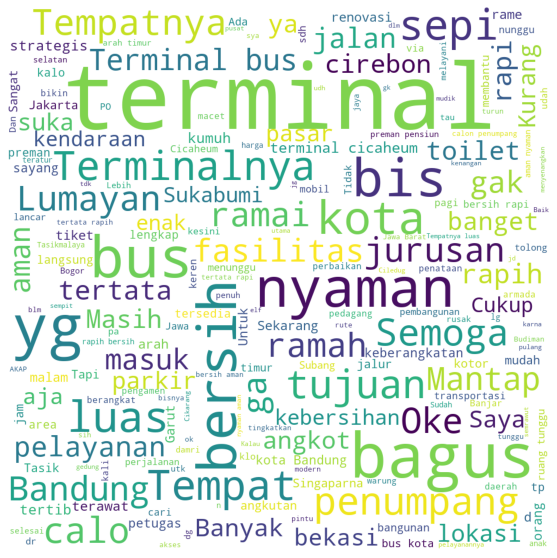

In [104]:
Ulasan = ' '.join(sentimen_df['Ulasan']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(width = 1000, height = 1000, background_color = "white").generate(Ulasan)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

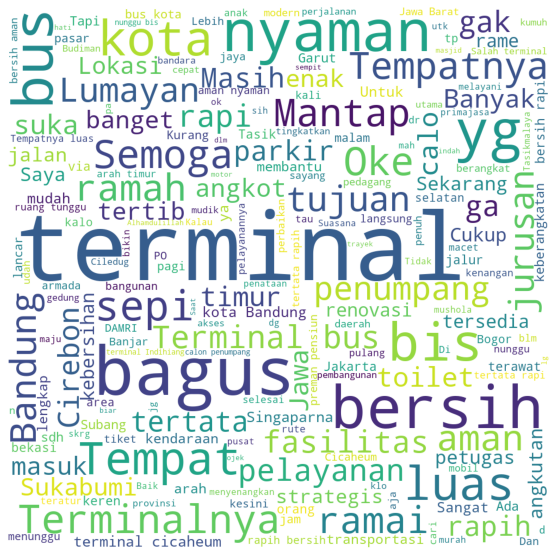

In [105]:
df_positif = sentimen_df[sentimen_df['Label'] == 'Positif']

text = ' '.join(df_positif['Ulasan']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(width = 1000, height = 1000, background_color = "white").generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

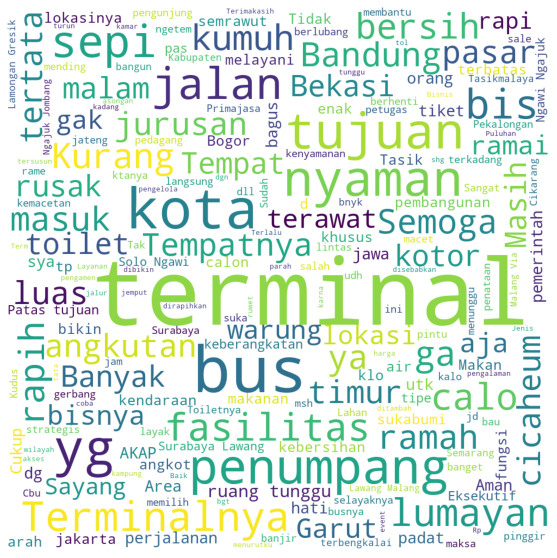

In [107]:
df_netral = sentimen_df[sentimen_df['Label'] == 'Netral']

text = ' '.join(df_netral['Ulasan']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(width = 1000, height = 1000, background_color = "white").generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

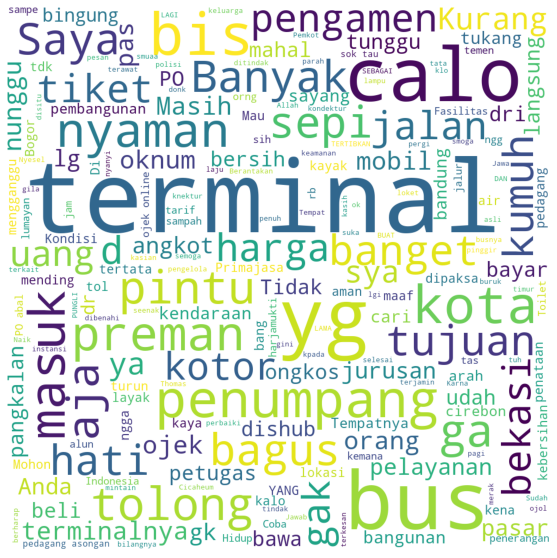

In [108]:
df_negatif = sentimen_df[sentimen_df['Label'] == 'Negatif']

text = ' '.join(df_negatif['Ulasan']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud(width = 1000, height = 1000, background_color = "white").generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [109]:
sentimen_df.head(5)

,Ulasan,Label
0,Terminalnya sederhana jurusan Jawa Barat,Positif
1,Tempat bus transportasi kampung halaman kota L...,Positif
2,Kotorsemrawutbanyak calo tiket,Negatif
3,Banyak pengamen Tolong dibenahi sistem kenyama...,Negatif
4,Banyak PREMAN PUNGLI AMBIL PAKET EH DIMINTAIN ...,Negatif


In [110]:
sentimen_df.tail(5)

,Ulasan,Label
1800,Ramai,Netral
1801,Mampir kios beras Subkhi jaya makmur,Positif
1802,Terminal transit persimpangan jalan gerbang to...,Netral
1803,Lumayan,Positif
1804,Tempat luas penjual makanan Tapi sayangnya asp...,Positif


In [113]:
sentimen_df.to_csv("data_analisis_sentimen.csv", 
          sep = ",")

In [119]:
sentimen_df.to_csv("data_analisis_sentimen.txt", 
          sep = ",")